<a href="https://colab.research.google.com/github/newmantic/Gibbs/blob/main/Gibbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def gibbs_sampling(num_samples, burn_in, initial_values, mu, sigma):
    """
    Gibbs Sampling algorithm for a bivariate normal distribution.

    :param num_samples: Number of samples to generate after burn-in.
    :param burn_in: Number of burn-in iterations.
    :param initial_values: Initial values for the variables (array-like).
    :param mu: Mean vector of the bivariate normal distribution.
    :param sigma: Covariance matrix of the bivariate normal distribution.
    :return: A list of samples generated from the target distribution.
    """
    x, y = initial_values
    samples = []

    for _ in range(num_samples + burn_in):
        # Sample x given y
        x = np.random.normal(mu[0] + sigma[0, 1] / sigma[1, 1] * (y - mu[1]),
                             np.sqrt(sigma[0, 0] - sigma[0, 1]**2 / sigma[1, 1]))

        # Sample y given x
        y = np.random.normal(mu[1] + sigma[1, 0] / sigma[0, 0] * (x - mu[0]),
                             np.sqrt(sigma[1, 1] - sigma[1, 0]**2 / sigma[0, 0]))

        if _ >= burn_in:
            samples.append([x, y])

    return np.array(samples)

In [3]:
def gibbs_sampling_multivariate(num_samples, burn_in, initial_values, mu, sigma):
    """
    Gibbs Sampling algorithm for a trivariate normal distribution.

    :param num_samples: Number of samples to generate after burn-in.
    :param burn_in: Number of burn-in iterations.
    :param initial_values: Initial values for the variables (array-like).
    :param mu: Mean vector of the trivariate normal distribution.
    :param sigma: Covariance matrix of the trivariate normal distribution.
    :return: A list of samples generated from the target distribution.
    """
    x, y, z = initial_values
    samples = []

    for _ in range(num_samples + burn_in):
        # Sample x given y, z
        x = np.random.normal(mu[0] + sigma[0, 1] / sigma[1, 1] * (y - mu[1]) +
                             sigma[0, 2] / sigma[2, 2] * (z - mu[2]),
                             np.sqrt(sigma[0, 0] - (sigma[0, 1]**2 / sigma[1, 1] + sigma[0, 2]**2 / sigma[2, 2])))

        # Sample y given x, z
        y = np.random.normal(mu[1] + sigma[1, 0] / sigma[0, 0] * (x - mu[0]) +
                             sigma[1, 2] / sigma[2, 2] * (z - mu[2]),
                             np.sqrt(sigma[1, 1] - (sigma[1, 0]**2 / sigma[0, 0] + sigma[1, 2]**2 / sigma[2, 2])))

        # Sample z given x, y
        z = np.random.normal(mu[2] + sigma[2, 0] / sigma[0, 0] * (x - mu[0]) +
                             sigma[2, 1] / sigma[1, 1] * (y - mu[1]),
                             np.sqrt(sigma[2, 2] - (sigma[2, 0]**2 / sigma[0, 0] + sigma[2, 1]**2 / sigma[1, 1])))

        if _ >= burn_in:
            samples.append([x, y, z])

    return np.array(samples)

In [5]:
def ising_model_gibbs(num_samples, burn_in, beta):
    """
    Gibbs Sampling for the Ising Model (binary variables).

    :param num_samples: Number of samples to generate after burn-in.
    :param burn_in: Number of burn-in iterations.
    :param beta: Interaction parameter of the Ising model.
    :return: A list of samples generated from the target distribution.
    """
    def conditional_probability(s, neighbors, beta):
        return 1 / (1 + np.exp(-2 * beta * sum(neighbors)))

    n = 10  # 10 spins (binary variables)
    samples = []
    s = np.random.choice([-1, 1], size=n)  # Random initial configuration

    for _ in range(num_samples + burn_in):
        for i in range(n):
            neighbors = np.delete(s, i)
            p = conditional_probability(s[i], neighbors, beta)
            s[i] = 1 if np.random.rand() < p else -1

        if _ >= burn_in:
            samples.append(s.copy())

    return np.array(samples)


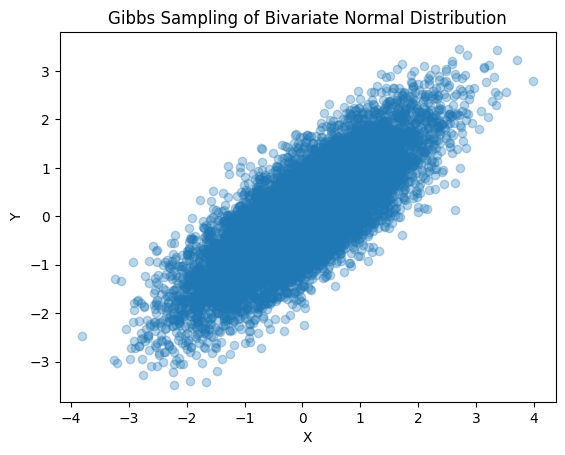

In [2]:
def test_case_1():
    num_samples = 10000
    burn_in = 1000
    initial_values = [2, -2]
    mu = [0, 0]
    sigma = np.array([[1, 0.8], [0.8, 1]])

    samples = gibbs_sampling(num_samples, burn_in, initial_values, mu, sigma)

    # Visualize the results
    import matplotlib.pyplot as plt
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3)
    plt.title("Gibbs Sampling of Bivariate Normal Distribution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

test_case_1()

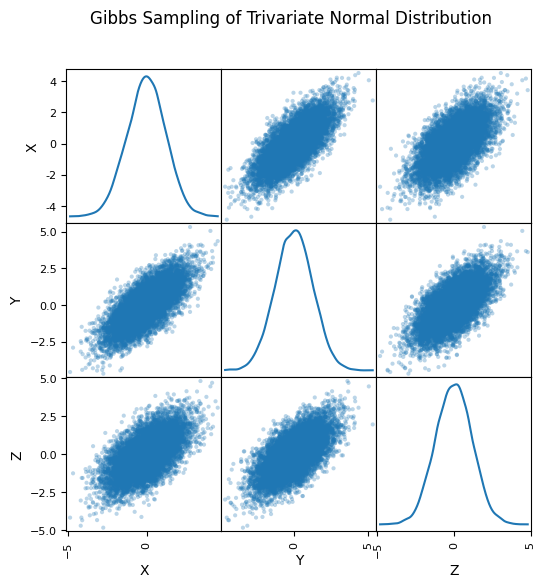

In [4]:
def test_case_2():
    num_samples = 10000
    burn_in = 1000
    initial_values = [1, 2, -1]
    mu = [0, 0, 0]
    sigma = np.array([[1, 0.5, 0.3],
                      [0.5, 1, 0.4],
                      [0.3, 0.4, 1]])

    samples = gibbs_sampling_multivariate(num_samples, burn_in, initial_values, mu, sigma)

    # Visualize the pairwise relationships
    import matplotlib.pyplot as plt
    from pandas.plotting import scatter_matrix
    import pandas as pd

    df = pd.DataFrame(samples, columns=["X", "Y", "Z"])
    scatter_matrix(df, alpha=0.3, figsize=(6, 6), diagonal='kde')
    plt.suptitle("Gibbs Sampling of Trivariate Normal Distribution")
    plt.show()

test_case_2()

In [6]:
def test_case_3():
    num_samples = 10000
    burn_in = 1000
    beta = 0.5  # Interaction strength

    samples = ising_model_gibbs(num_samples, burn_in, beta)

    # Analyze the average spin value
    average_spin = np.mean(samples, axis=0)
    print(f"Average spin values: {average_spin}")

test_case_3()

Average spin values: [1.     0.9998 1.     1.     0.9998 0.9996 1.     0.9996 1.     1.    ]
